In [1]:
# Defines
#=================================================#
IS_TRAIN_NOT_TEST = True

ENV_LOCAL_MACHINE   = 1
ENV_GOOGLE_COLLABS  = 2
ENV_KAGGLE          = 3
ENVIRONMENT = ENV_LOCAL_MACHINE

#=================================================#
RANDOM_SEED = 214
OVERSAMPLING_RATIO = 0.3
UNDERSAMPLING_RATIO = 0.8
N_JOBS = -1

#=================================================#
PATH_INPUT              = "dataset/creditcard/"
PATH_OUTPUT             = "outputs/creditcard/"

CSV_DATASET_RAW                     = "creditcard.csv"
CSV_DATASET_TRAIN                   = "dataset_train.csv"
CSV_DATASET_TEST                    = "dataset_test.csv"
CSV_DATASET_TRAIN_TRANSFORMED       = "dataset_train_t.csv"
CSV_DATASET_TEST_TRANSFORMED        = "dataset_test_t.csv"


if ENVIRONMENT == ENV_LOCAL_MACHINE:
    PATH_DATASET_BASE  = "../"
if ENVIRONMENT == ENV_GOOGLE_COLLABS:
    PATH_DATASET_BASE  = "drive/MyDrive/UTN_Finales/[F] Aprendizaje Automatico/Repositorio/"

FEATURE_TARGET = "Class"

In [2]:
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [3]:
# Import dataset train
dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN)
print("Dataset Size:", dataset.shape[0])
X_train = dataset.drop(FEATURE_TARGET, axis=1)
y_train = dataset[FEATURE_TARGET]

dataset.sample(3)

Dataset Size: 199364


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
127848,53.0,-1.198968,-1.474100,1.840326,-4.515824,0.327567,-0.174469,0.959726,-1.026456,1.700435,...,-0.453169,0.334614,-0.364541,-0.310186,-0.302599,-1.243924,-1.123457,-0.734351,89.17,0
123917,71058.0,-0.553847,0.776657,1.116124,0.349280,0.831499,0.012794,1.303352,-0.084417,-0.855194,...,0.102930,0.275655,-0.278332,-0.348372,0.327056,-0.293716,-0.113686,-0.145079,54.61,0
17664,71535.0,-3.625969,0.825429,0.512787,0.688776,-0.096570,0.657940,0.518043,0.085877,1.096967,...,-0.401184,0.263244,-0.371811,-0.951078,0.843392,-0.087585,-0.045750,0.887204,99.00,0


In [6]:
# Import dataset test
dataset_test= pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TEST)
print("Dataset Size:", dataset_test.shape[0])
X_test = dataset_test.drop(FEATURE_TARGET, axis=1)
y_test = dataset_test[FEATURE_TARGET]

dataset_test.sample(3)

Dataset Size: 85443


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
44311,82893.0,-1.237163,0.063736,1.739161,0.416482,0.845443,-0.333974,0.405145,0.296806,-0.392827,...,0.110768,0.135078,-0.035583,0.200522,0.256515,-0.492159,0.059914,0.105235,42.20,0
1945,159337.0,1.965994,-0.098863,-2.998317,0.047389,1.418895,-0.577498,1.091713,-0.473676,-0.281215,...,0.353727,0.982998,-0.406605,-0.041544,0.924035,0.109120,-0.100749,-0.077366,107.76,0
60383,37621.0,-1.195227,2.553518,-2.063590,0.322591,0.346908,1.866844,-4.148460,-10.442550,-1.325403,...,-5.225842,1.069436,0.536916,-1.512040,0.655506,0.420932,-0.118964,0.263114,0.76,0


In [7]:
# Transform
columns_to_exp    = ['V8', 'V11', 'V19', 'V21', 'V22']
columns_to_cbrt   = ['Time', 'V24', 'V28']
columns_to_log1p  = ['V20', 'V25', 'V26', 'V27', 'Amount']

dataset[columns_to_exp]   = np.exp(dataset[columns_to_exp])
dataset[columns_to_cbrt]  = np.cbrt(dataset[columns_to_cbrt])
dataset[columns_to_log1p] = np.log1p(dataset[columns_to_log1p])

d:\Program Files\Python\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [8]:
# Specify columns for standardization and normalization
columns_to_standardize = ['Time', 'V1', 'V5', 'V11', 'V19', 'V21', 'V22', 'V23', 'V24', 'V28']
columns_to_normalize = ['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V25', 'V26', 'V27', 'Amount']

# Create instances of scalers
scaler_standard = StandardScaler()
scaler_minmax   = MinMaxScaler()

# Apply transformations to specified columns
dataset[columns_to_standardize] = scaler_standard.fit_transform(dataset[columns_to_standardize])
dataset[columns_to_normalize]   = scaler_minmax.fit_transform(dataset[columns_to_normalize])

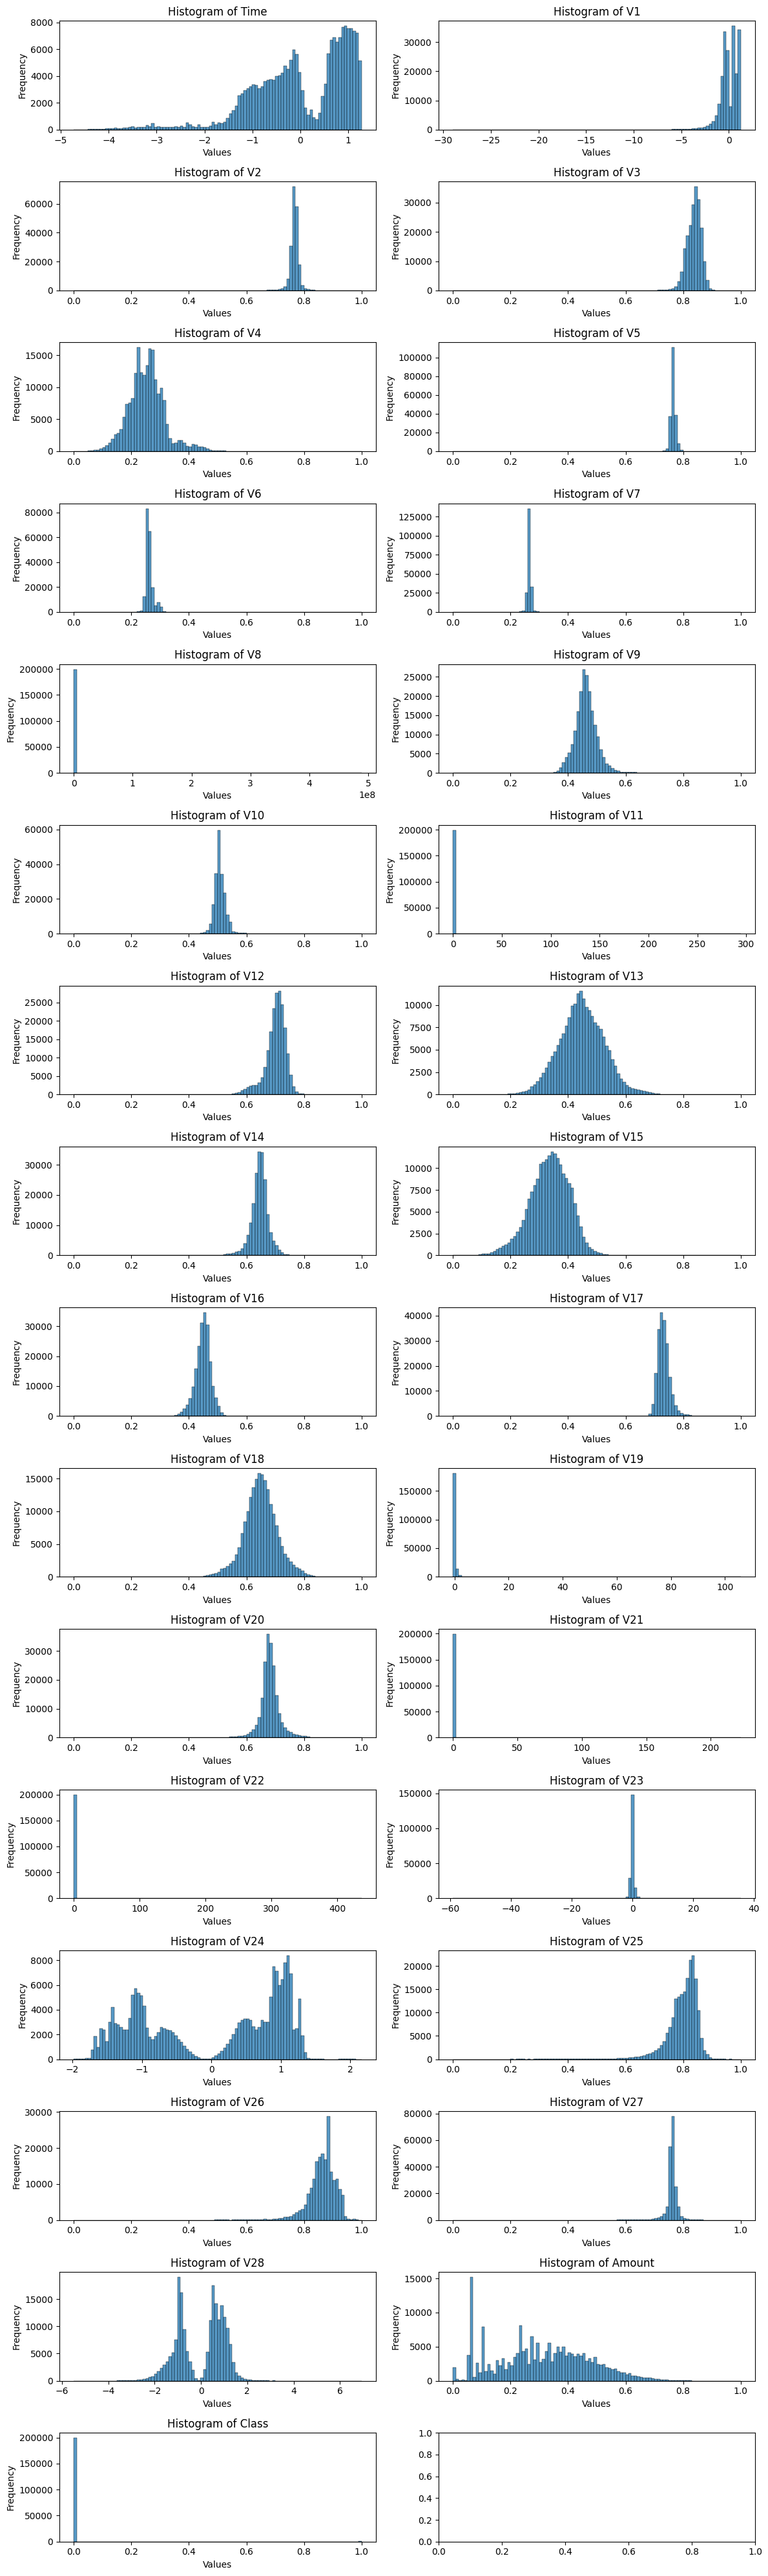

In [9]:
# Determine the number of rows and columns for subplots
num_cols = len(dataset.columns)
num_rows = int(np.ceil(num_cols / 2))  # Adjust as needed for your dataset

# Create subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 2.5 * num_rows))

# Flatten the axs array in case num_rows = 1
axs = axs.flatten()

for i, param in enumerate(dataset.columns):
    sns.histplot(dataset[param], bins=100, ax=axs[i])
    axs[i].set_title(f'Histogram of {param}')
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Frequency')

# Adjust layout and display
plt.tight_layout()
plt.show()

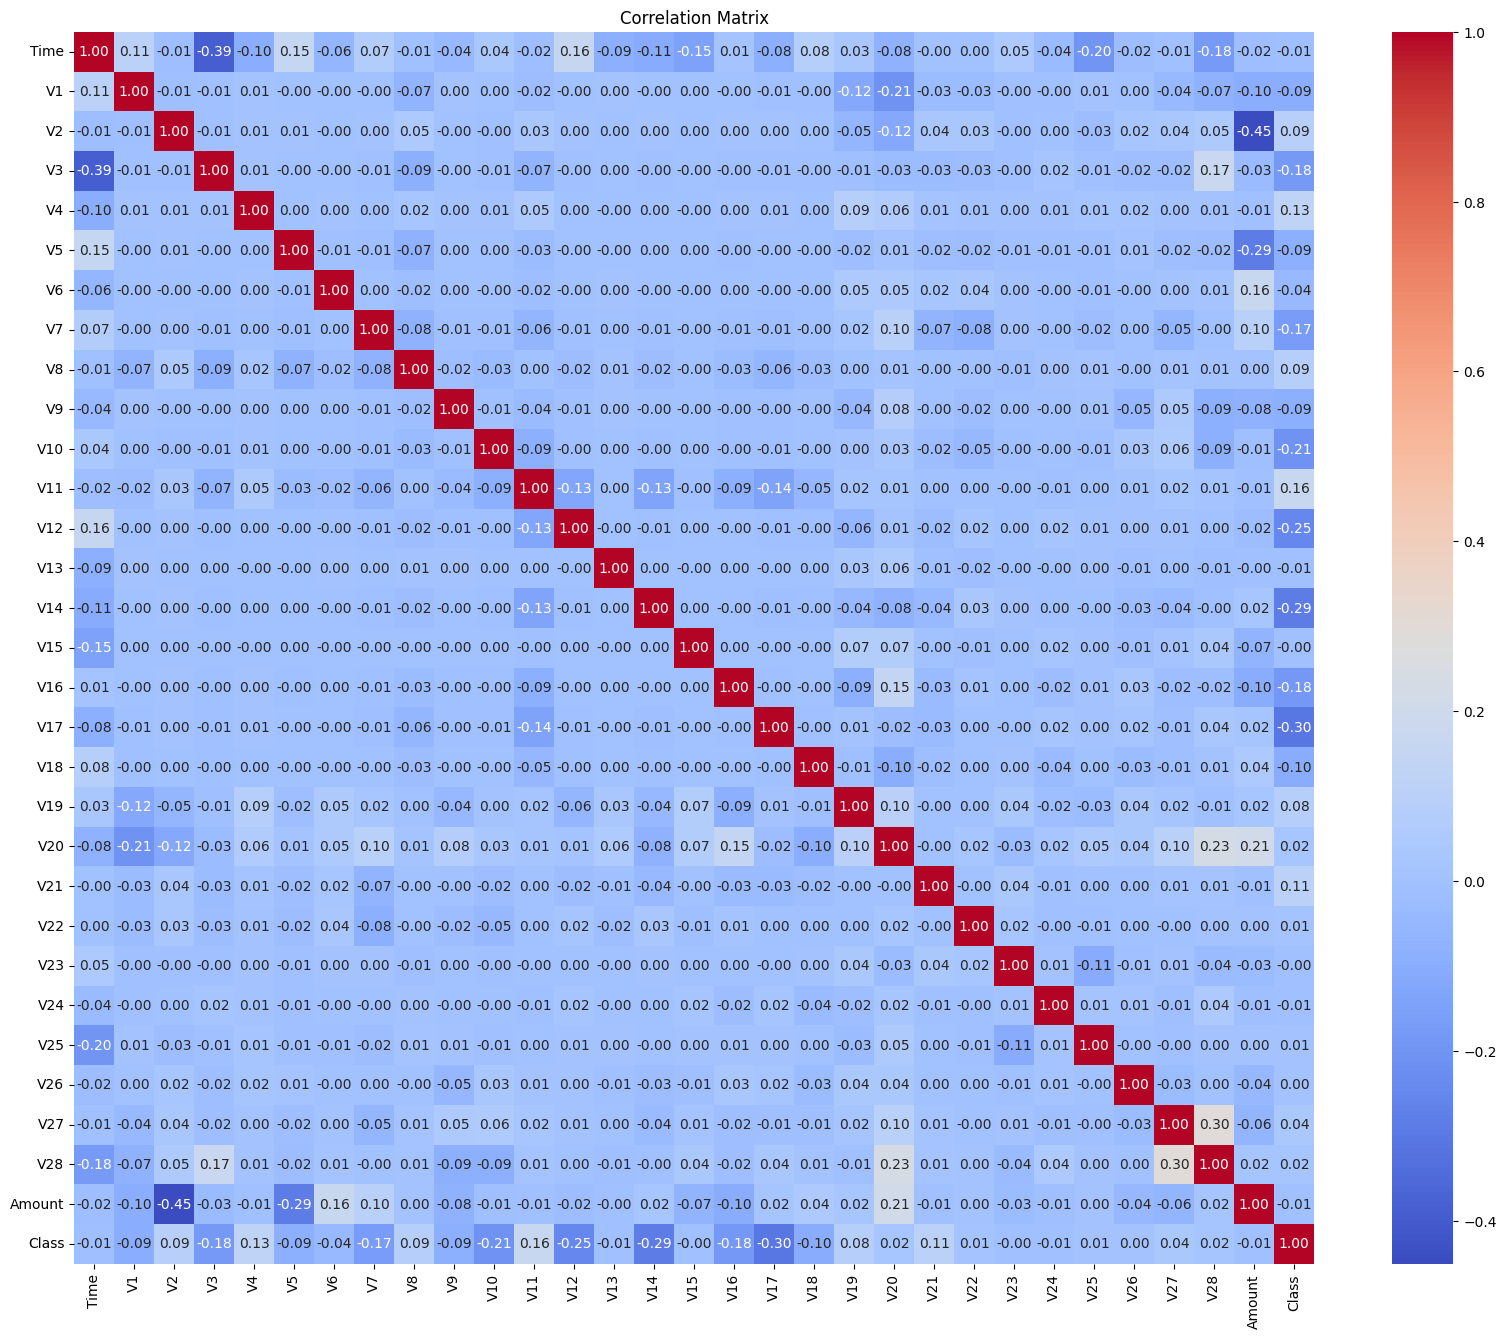

In [18]:
# Plot the correlation matrix
corr_matrix = dataset.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [20]:
high_corr_features = corr_matrix[abs(corr_matrix[FEATURE_TARGET]) >= 0.01].index
high_corr_features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
       'V27', 'V28', 'Class'],
      dtype='object')

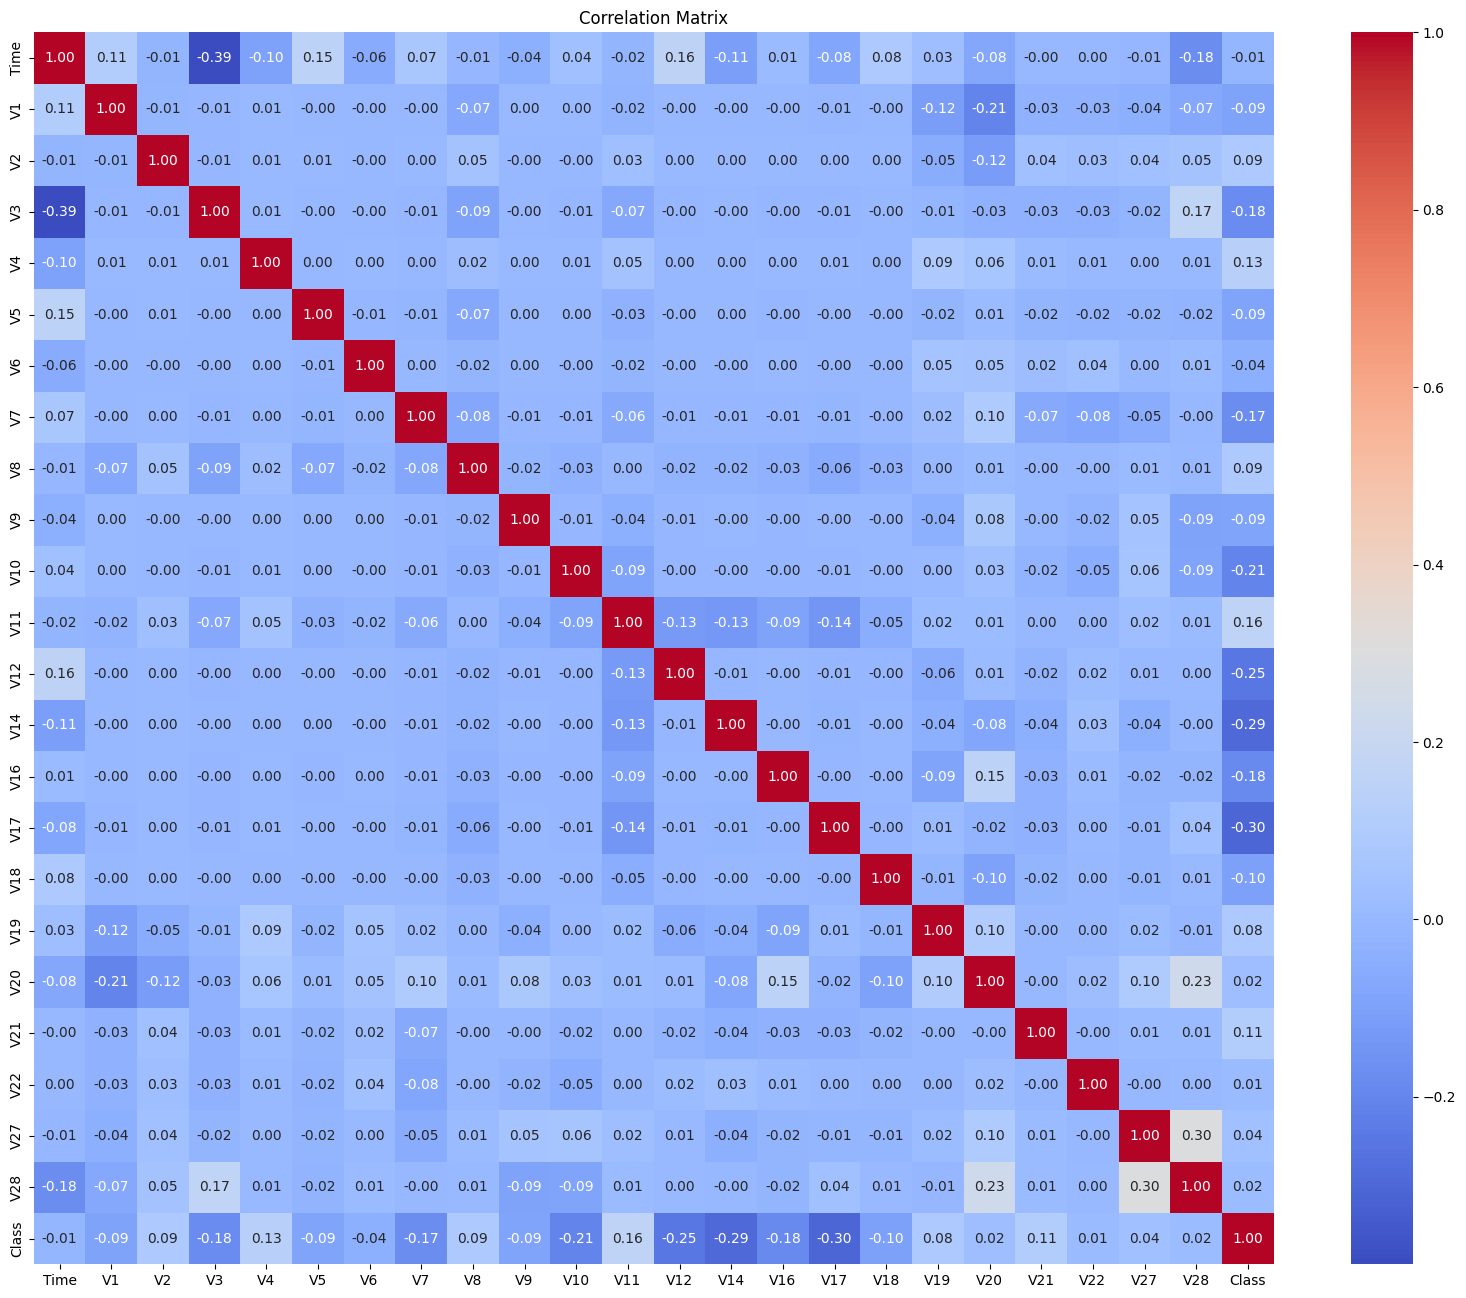

In [21]:
filtered_dataset = dataset[high_corr_features]
# Plot the correlation matrix
corr_matrix_filtered = filtered_dataset.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [22]:
# Save test dataset apart to another file
pd.concat([X_test, y_test], axis=1).to_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TEST_TRANSFORMED, index=False)

# Save train dataset apart to another file
pd.concat([X_train, y_train], axis=1).to_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN_TRANSFORMED, index=False)